In [172]:
from pathlib import Path
import numpy as np
import glob
from PIL import Image
from collections import defaultdict
import json
from utils import NestedDefaultDict, write_dict_to_json
from matplotlib import pyplot as plt
import os
from torch.utils.data import Dataset
from random import randint
import json
import math
from pathlib import Path
from random import randint
import glob
import numpy as np
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
import sys
from collections import defaultdict
import pickle
from statistics import stdev

In [173]:
import json
import statistics
with open('mspd_real_synthetic.txt','r') as f:
    mspd_real_synthetic = json.load(f)
with open('mspd_real_sym.txt','r') as f:
    mspd_real_sym = json.load(f)

with open('mspd_real.txt','r') as f:
    mspd_real = json.load(f)
    
with open('mspd_real_synthetic_sym.txt','r') as f:
    mspd_real_synthetic_sym = json.load(f)

with open('mspd_nocs.txt','r') as f:
    mspd_nocs = json.load(f)


real = []
real_ = []
for cls, value in mspd_real.items():
    real.append(round(value['mean'],2))
    real_.extend(value['mspd'])
real_avg = sum(real)/len(real)


real_sym = []
real_sym_=[]
for cls, value in mspd_real_sym.items():
    real_sym.append(round(value['mean'],2))  
    real_sym_.extend(value['mspd'])
real_sym_avg = sum(real_sym)/len(real_sym)


real_synthetic = []
real_synthetic_ = []
for cls, value in mspd_real_synthetic.items():
    real_synthetic.append(round(value['mean'],2))
    real_synthetic_.extend(value['mspd'])
real_synthetic_avg = sum(real_synthetic)/len(real_synthetic)


real_synthetic_sym = []
real_synthetic_sym_ = []
for cls, value in mspd_real_synthetic_sym.items():
    real_synthetic_sym.append(round(value['mean'],2))
    real_synthetic_sym_.extend(value['mspd'])
real_synthetic_sym_avg = sum(real_synthetic_sym)/len(real_synthetic_sym)

nocs = []
nocs_ = []
for cls, value in mspd_nocs.items():
    nocs.append(round(value['mean'],2))
    nocs_.extend(value['mspd'])
nocs_avg = sum(nocs)/len(nocs)

real[2], real[3] = real[3], real[2]
real_synthetic[2], real_synthetic[3] = real_synthetic[3], real_synthetic[2]
real_sym[2], real_sym[3] = real_sym[3], real_sym[2]
real_synthetic_sym[2], real_synthetic_sym[3] = real_synthetic_sym[3], real_synthetic_sym[2]
nocs[2], nocs[3] = nocs[3], nocs[2]

cls = ['bottle', 'bowl', 'can', 'camera', 'laptop', 'cup']

In [174]:
print(real,real_avg)
print(real_sym,real_sym_avg)
print(real_synthetic,real_synthetic_avg)
print(real_synthetic_sym,real_synthetic_sym_avg)
print(nocs, nocs_avg)

[29.38, 47.05, 28.04, 38.6, 92.28, 67.31] 50.44333333333333
[21.81, 25.49, 21.17, 38.98, 125.88, 59.23] 48.76
[53.61, 84.29, 117.01, 71.3, 204.69, 59.45] 98.39166666666667
[24.85, 30.45, 26.79, 61.08, 174.77, 62.47] 63.401666666666664
[42.25, 46.34, 44.07, 43.01, 87.03, 45.39] 51.34833333333333


In [175]:
def clean(data,threshold=800):
    data_arr = np.array(data)
    return data_arr[np.where(data_arr<1000)].tolist()
    
    

<Figure size 432x288 with 0 Axes>

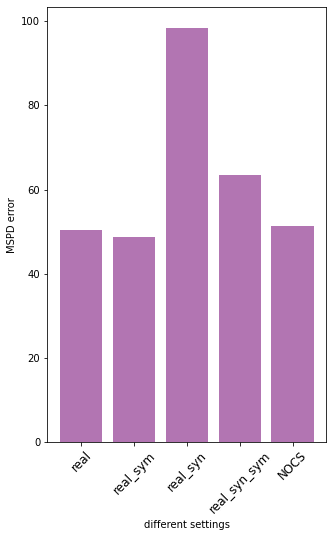

In [176]:
# fig2, ax2 = plt.subplots()
# fig2.set_size_inches(5, 8)

# A = [real_avg, real_sym_avg, real_synthetic_avg, real_synthetic_sym_avg,nocs_avg ]
# A_bar = ['real', 'real_sym', 'real_syn', 'real_syn_sym', 'nocs']
# x_pos = np.arange(len(A_bar))
# ax2.bar(x_pos, A, color = (0.5,0.1,0.5,0.6))

# # Add title and axis names
# ax2.set(
#     xlabel='different settings',
#     ylabel='MSPD error'
# )
# # Create names on the x axis
# ax2.set_xticklabels(A_bar),
#                     rotation=45, fontsize=12)
# # plt.figure(figsize=(5,10))
# # # Show graph
# # plt.show()
plt.figure()
plt.figure(figsize=(5,8))
A = [real_avg, real_sym_avg, real_synthetic_avg, real_synthetic_sym_avg,nocs_avg ]
A_bar = ['real', 'real_sym', 'real_syn', 'real_syn_sym', 'NOCS']
x_pos = np.arange(len(A_bar))
x_pos = np.arange(len(A_bar))
 
# Create bars and choose color
plt.bar(x_pos, A, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.xlabel('different settings')
plt.ylabel('MSPD error')
 
# Create names on the x axis
plt.xticks(x_pos, A_bar,rotation=45, fontsize=12)
 
# Show graph
# plt.show()
plt.savefig("predicts/A1.png")

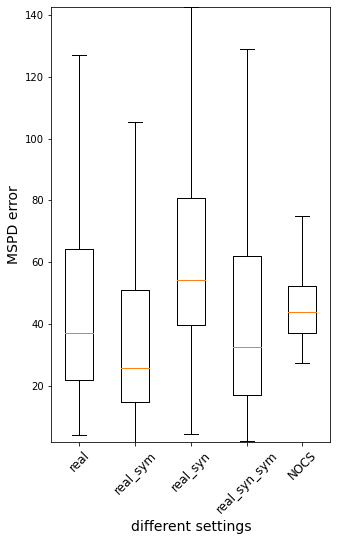

In [177]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(5, 8)


#  ['real', 'real_sym', 'real_syn', 'real_syn_sym', 'nocs' ]
ax1.boxplot([clean(real_),clean(real_sym_),clean(real_synthetic_), clean(real_synthetic_sym_), nocs_],showfliers=False)
ax1.set_xticklabels(A_bar,
                    rotation=45, fontsize=12)
ax1.margins(y=0)

ax1.set(
    xlabel='different settings',
    ylabel='MSPD error'
)
ax1.xaxis.label.set_size(14)
ax1.yaxis.label.set_size(14)
fig1.savefig('predicts/A2.png')

In [178]:
real_sym

[21.81, 25.49, 21.17, 38.98, 125.88, 59.23]

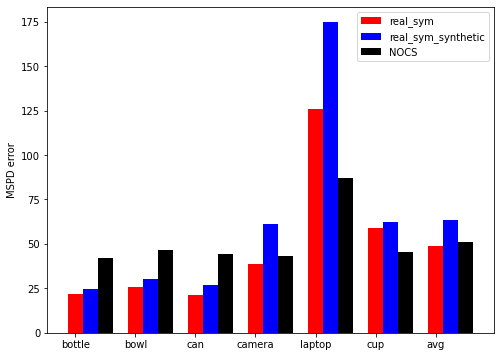

In [179]:
real.append(real_avg)
real_sym.append(real_sym_avg)
real_synthetic_sym.append(real_synthetic_sym_avg)
real_synthetic.append(real_synthetic_avg)
nocs.append(nocs_avg)

labels =['bottle', 'bowl', 'can', 'camera', 'laptop', 'cup', 'avg']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
rects1 = ax.bar(x , real_sym, width, label='real_sym',color='red')
rects2 = ax.bar(x + width, real_synthetic_sym, width, label='real_sym_synthetic',color='blue')
rects3 = ax.bar(x + 2*width, nocs, width, label='NOCS',color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSPD error')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.savefig('predicts/B.png')

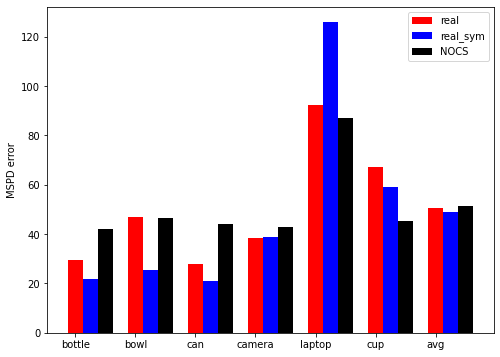

In [180]:

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
rects1 = ax.bar(x , real, width, label='real',color='red')
rects2 = ax.bar(x + width, real_sym, width, label='real_sym',color='blue')
rects3 = ax.bar(x + 2*width, nocs, width, label='NOCS',color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSPD error')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.savefig('predicts/C.png')